In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score
filterwarnings("ignore")

In [7]:
data = pd.read_csv('brain_stroke.csv', delimiter=';')
df = data.copy()

In [8]:
data.shape #Nos données ont 5110 lignes et 11 colonnes.

(3481, 11)

In [9]:
data.columns #Ci-dessous sont nos fonctionnalités

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
data.head() # Les 5 premières lignes de nos données

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   object 
 1   age                3481 non-null   int64  
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   object 
 5   work_type          3481 non-null   object 
 6   Residence_type     3481 non-null   object 
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   object 
 10  stroke             3481 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 299.3+ KB


In [12]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,3481.0,49.067509,18.894255,10.00,34.00,50.00,64.00,82.00
hypertension,3481.0,0.123240,0.328760,0.00,0.00,0.00,0.00,1.00
heart_disease,3481.0,0.065211,0.246934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,3481.0,108.769155,48.133475,55.12,77.45,92.49,116.25,271.74
bmi,3481.0,29.808159,6.228310,14.10,25.30,29.10,33.50,48.90
stroke,3481.0,0.057742,0.233288,0.00,0.00,0.00,0.00,1.00


# Attribuer une valeur aux données vides

In [13]:
data.bmi.mean() 

29.80815857512209

In [14]:
data["bmi"]=data["bmi"].fillna(data["bmi"].mean()) 

#Nous avons appelé la méthode fillna pour remplir les données nulles. Nous y avons attribué la valeur moyenne de l'IMC.

In [15]:
data.isnull().sum()
#réussi

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# L'analyse exploratoire des données

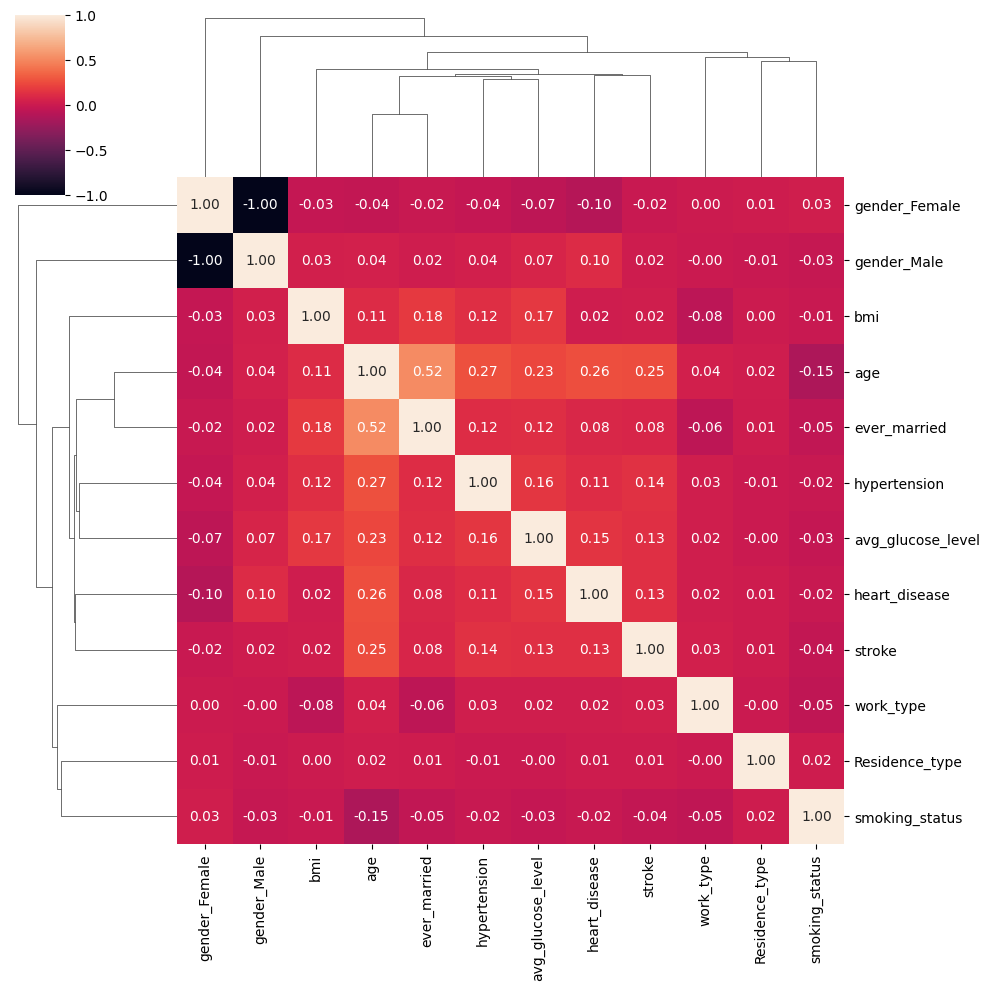

In [33]:
corr_matrix=data.corr()
sns.clustermap(corr_matrix,annot=True,fmt =".2f")
plt.show()

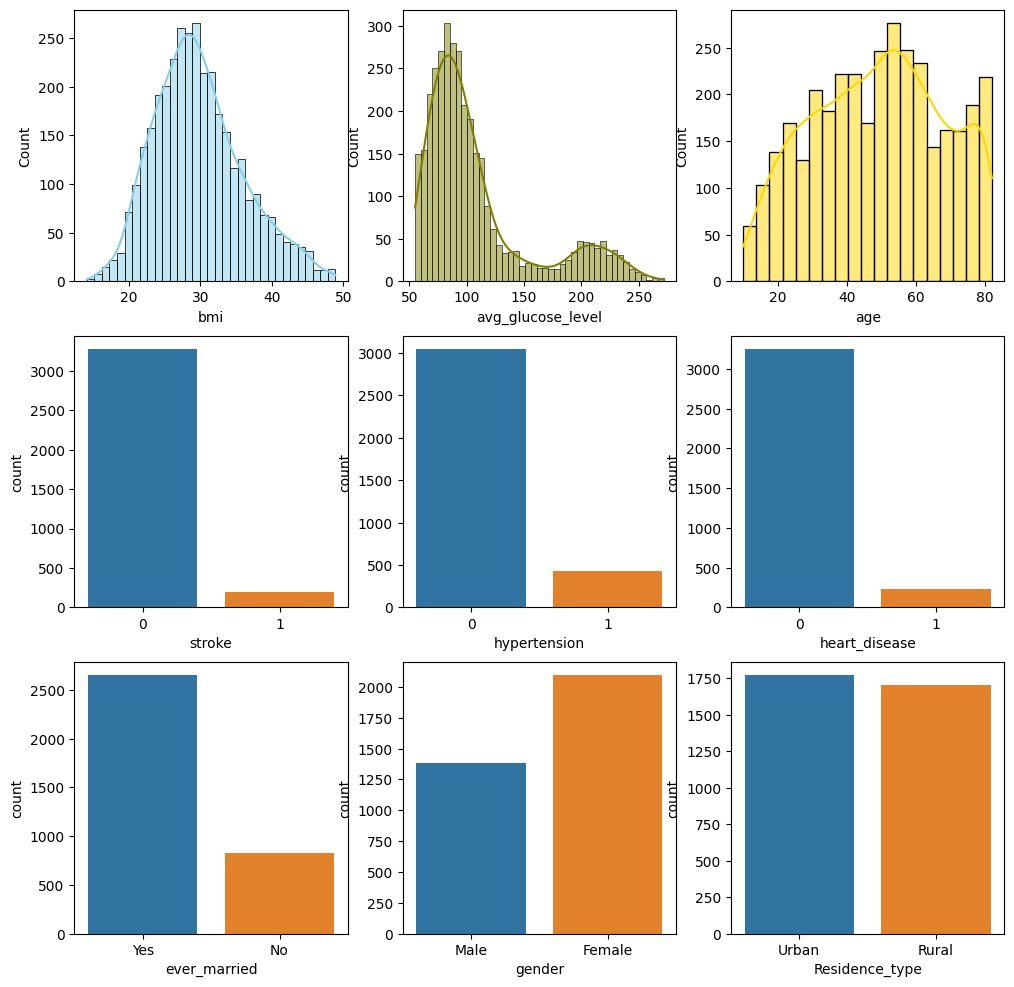

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
sns.histplot(data=data["bmi"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data["avg_glucose_level"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data["age"], kde=True, color="gold", ax=axs[0, 2])
sns.countplot(x = data["stroke"], ax=axs[1, 0])

sns.countplot(x = data[L'analyse exploratoire des données"hypertension"], ax=axs[1, 1])
sns.countplot(x = data["heart_disease"], ax=axs[1, 2])
sns.countplot(x = data["ever_married"], ax=axs[2, 0])
sns.countplot(x = data["gender"], ax=axs[2, 1])
sns.countplot(x = data["Residence_type"], ax=axs[2, 2])

plt.show()

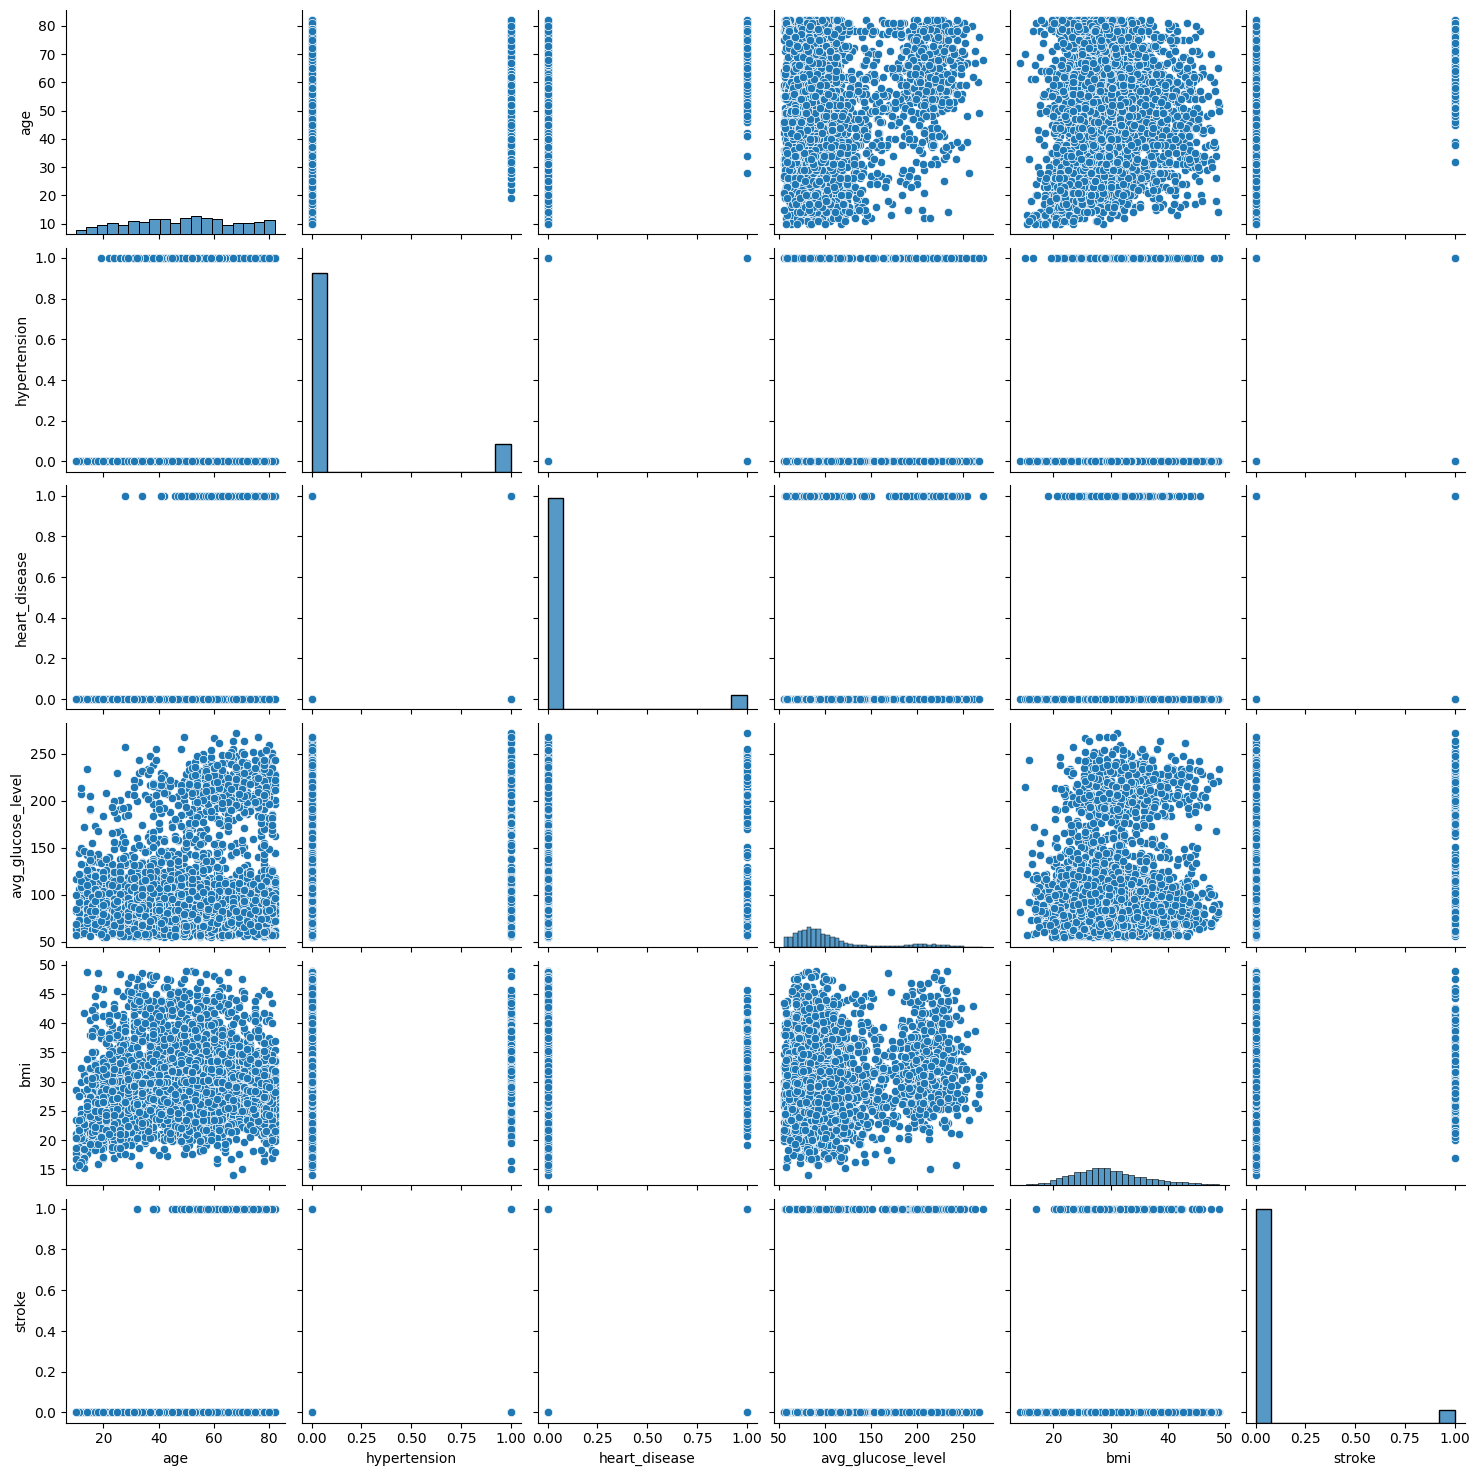

In [18]:
sns.pairplot(data)

<Axes: xlabel='stroke', ylabel='ever_married'>

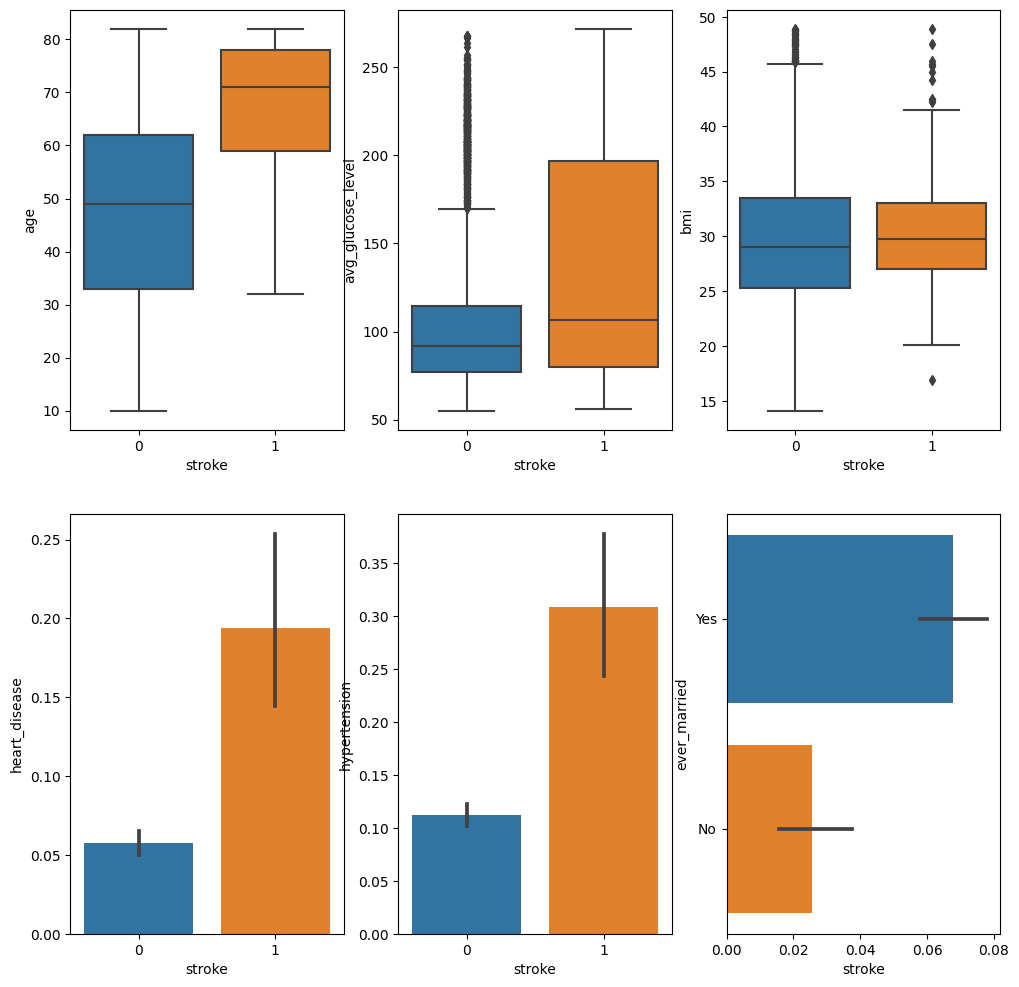

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))

sns.boxplot(x=data["stroke"], y=data["age"], ax=axs[0, 0])
sns.boxplot(x=data["stroke"], y=data["avg_glucose_level"], ax=axs[0, 1])
sns.boxplot(x=data["stroke"], y=data["bmi"], ax=axs[0, 2])
sns.barplot(x=data["stroke"], y=data["heart_disease"], ax=axs[1, 0])
sns.barplot(x=data["stroke"], y=data["hypertension"], ax=axs[1, 1])
sns.barplot(x=data["stroke"], y=data["ever_married"], ax=axs[1, 2])

[]

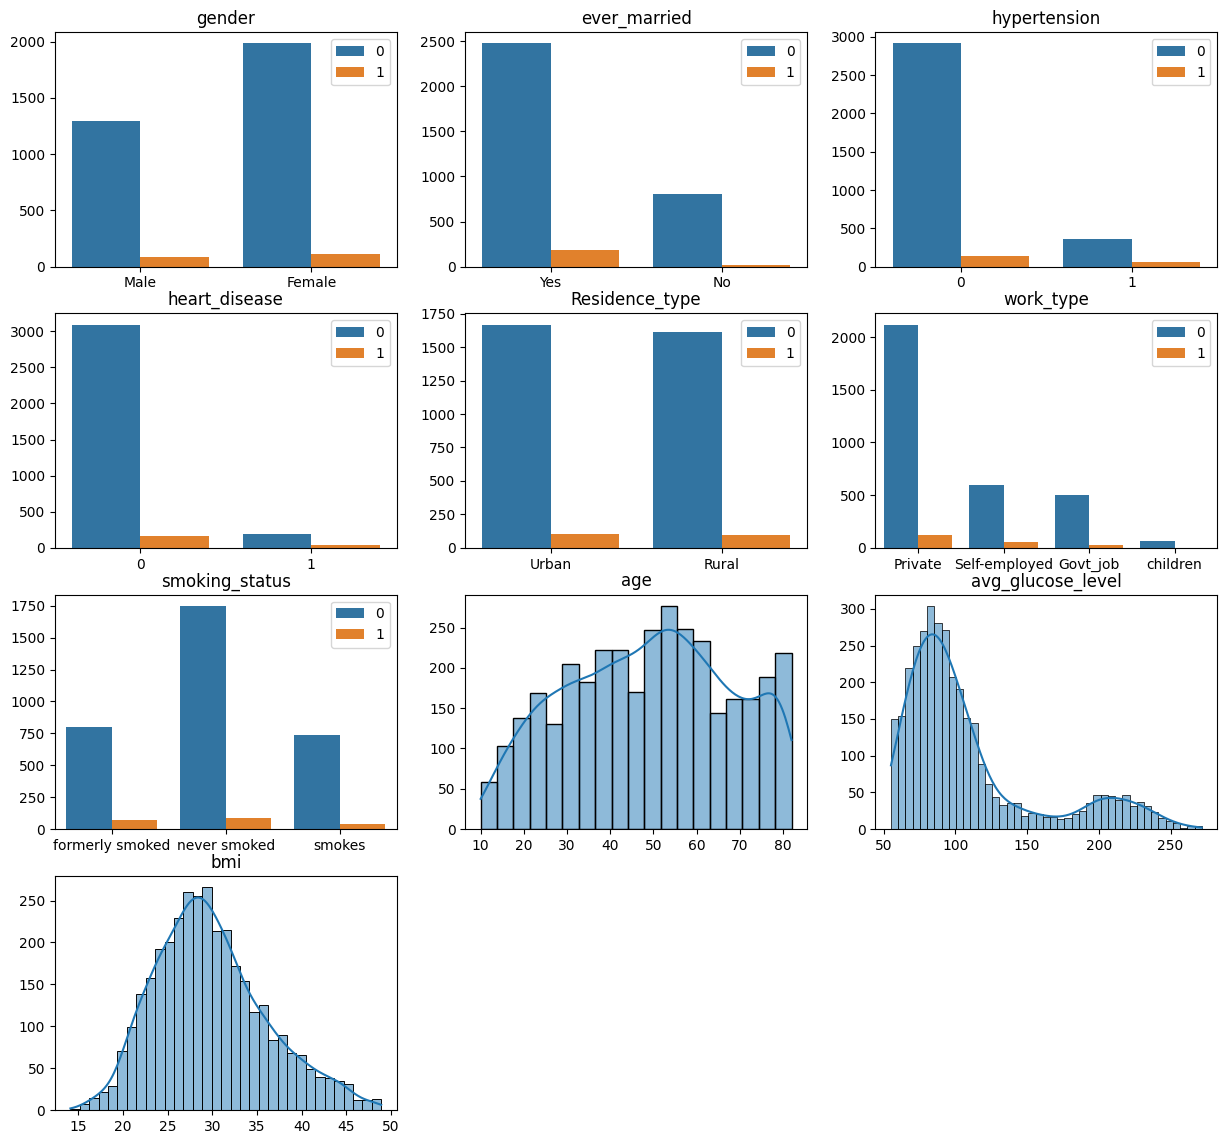

In [20]:
# Tracer les données pour trouver la distribution entre elles :
object_cols = ['gender', 'ever_married','hypertension', 'heart_disease', 'Residence_type','work_type','smoking_status']
num_cols = ['age', 'avg_glucose_level', 'bmi']
fig,ax = plt.subplots(figsize = (15, 14))
idx = 0
for i in object_cols:
    plt.subplot(4,3,idx+1)
    sns.countplot(x = i, data = df, hue = df['stroke'])
    plt.xlabel(None)
    plt.ylabel(None)
    #plt.xticks(None)
    plt.title(i)
    plt.legend()
    idx += 1

for i in num_cols:
    plt.subplot(4,3,idx+1)
    sns.histplot(x = df[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx+=1
    
plt.plot()

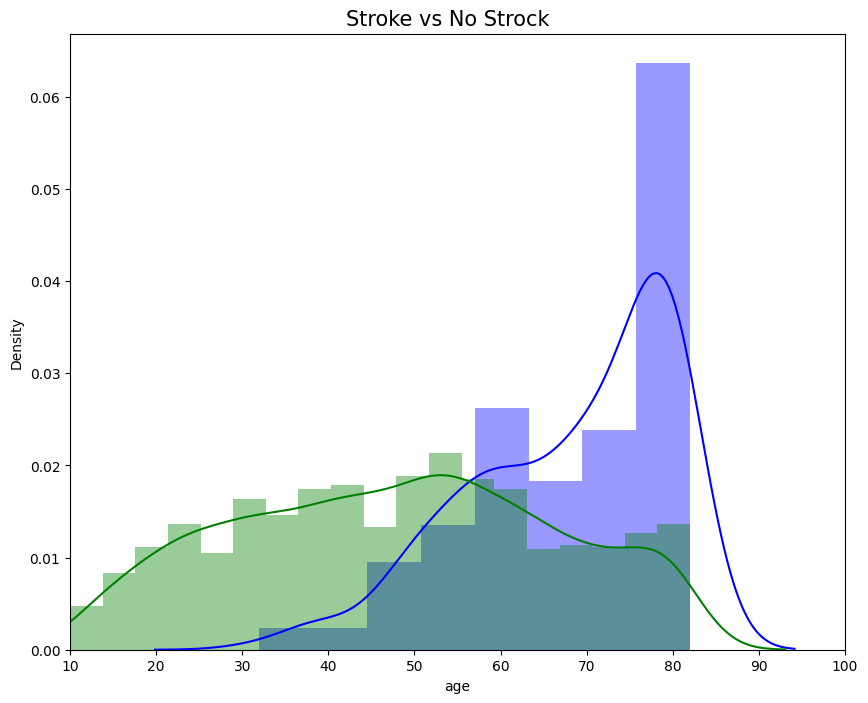

In [30]:
plt.figure(figsize=(10,8))

sns.distplot(data[data.stroke != 0]["age"], color="blue")
sns.distplot(data[data.stroke == 0]["age"], color="green")


plt.title("Stroke vs No Strock   ", fontsize=15)
plt.xlim([10,100])
plt.show()
